# Tổng quan về tập dữ liệu 

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.
We provide the data both in .ods and in .xlsx formats.

Relevant Papers to cite:

Pınar Tüfekci, Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615, http://dx.doi.org/10.1016/j.ijepes.2014.02.027.
(http://www.sciencedirect.com/science/article/pii/S0142061514000908)

Heysem Kaya, Pınar Tüfekci , Sadık Fikret Gürgen: Local and Global Learning Methods for Predicting Power of a Combined Gas & Steam Turbine, Proceedings of the International Conference on Emerging Trends in Computer and Electronics Engineering ICETCEE 2012, pp. 13-18 (Mar. 2012, Dubai)


In [1]:
import pandas as pd 

In [2]:
pdf = pd.read_excel('Folds5x2_pp.xlsx', sheet_name= None)

In [3]:
pd_df = pd.concat(pdf, axis=0, ignore_index=True)

# Tập dữ liệu sau khi làm sạch 

In [4]:
pd_df.dropna()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
47835,15.12,48.92,1011.80,72.93,462.59
47836,33.41,77.95,1010.30,59.72,432.90
47837,15.99,43.34,1014.20,78.66,465.96
47838,17.65,59.87,1018.58,94.65,450.93


# Thống kê cơ bản về tập dữ liệu

In [5]:
pd_df.describe()

,AT,V,AP,RH,PE
count,47840.000000,47840.000000,47840.000000,47840.000000,47840.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452162,12.707362,5.938535,14.599658,17.066281
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
df = pd_df

In [7]:
a = df.corr(method='pearson', min_periods=1)

# Đồ thị tương quan giữa các biến

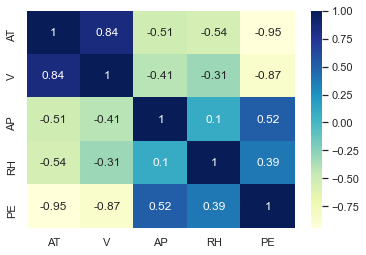

In [8]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(a,cmap="YlGnBu",annot=True)


In [9]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df[['AT','V',
        'AP', 'RH'
       ]] # inputs
y = df['PE'] # output

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [13]:
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)


# Thông số sau khi train 

In [14]:
print("Bias model là :",model.intercept_)

Bias model là : 457.6675681758927


In [15]:
print("Hệ số của các biến theo thứ tự là: ",model.coef_)


Hệ số của các biến theo thứ tự là:  [-1.97815624 -0.23365183  0.05908933 -0.15854808]


In [16]:
print("Độ chính xác tổng của cả tập data :",model.score(X, y))

Độ chính xác tổng của cả tập data : 0.928694608570378


In [17]:
print("Độ chính xác của tập Train :",model.score(X_train, y_train))

Độ chính xác của tập Train : 0.9280004833210621


In [18]:
print("Độ chính xác của tập test :",model.score(X_test, y_test))

Độ chính xác của tập test : 0.9300746413489677


In [19]:
print("Sai số toàn phương trung bình của model là",mean_squared_error(y_pred, y_test))

Sai số toàn phương trung bình của model là 20.4704235181663


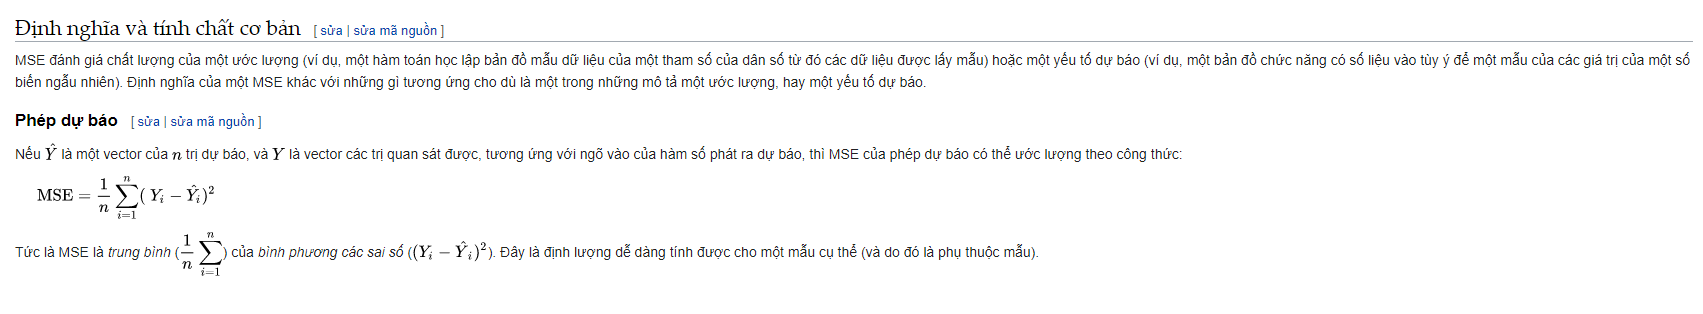

In [21]:
import matplotlib.pyplot as plt

# Biểu đồ Dự đoán của tập test

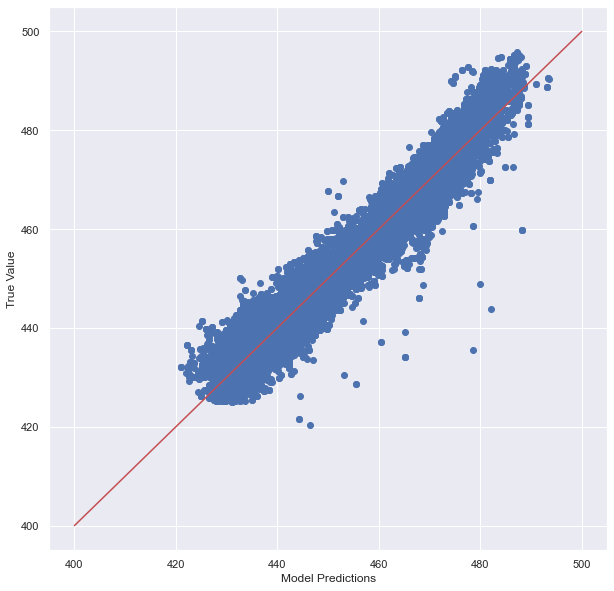

In [22]:

plt.figure(figsize=(10,10))
plt.scatter(model.predict(X_test),y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([400, 500], [400, 500],'r')
plt.show()

# Biểu đồ tương quan giữa thực tế và dự đoán 

C:\Users\trung\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\trung\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\trung\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

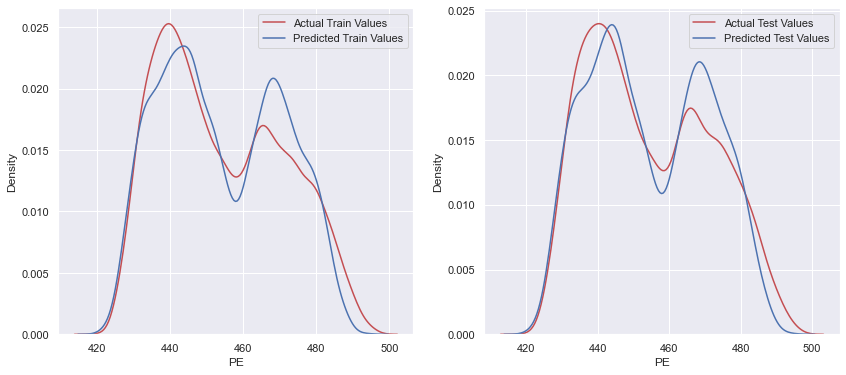

In [23]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color="r", 
                   label="Actual Train Values", kde=True,)
sns.distplot(model.predict(X_train), hist=False, color="b", 
             label="Predicted Train Values", ax=ax1, kde=True,)
plt.legend()
plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r", 
                   label="Actual Test Values")
sns.distplot(model.predict(X_test), hist=False, color="b", 
             label="Predicted Test Values" , ax=ax2)
plt.legend()
plt.show()

In [24]:
def predict_model(AT,V,AP,RH):
    X_new = pd.DataFrame({
    'AT': [AT],
    'V': [V],
    'AP': [AP],
    'RH': [RH]})
    y_new = model.predict(X_new)
    print("The PE of CCPP could be : ", y_new)

In [25]:
from ipywidgets import interactive, HBox,Layout,Button,GridspecLayout

In [26]:
widget = interactive(predict_model,AT=(1,100,1),V=(1, 100, 1), AP=(900,1100,1),RH=(1,100,1))

In [27]:
widget.children

(IntSlider(value=50, description='AT', min=1),
 IntSlider(value=50, description='V', min=1),
 IntSlider(value=1000, description='AP', max=1100, min=900),
 IntSlider(value=50, description='RH', min=1),
 Output())

In [28]:
controls = HBox(widget.children[:-1], layout = Layout(flex_flow='column wrap'),width='auto', height='auto')
output = widget.children[-1]

In [29]:
def create_expanded_button(description, button_style):
    return Button(description=description, button_style=button_style, layout=Layout(height='auto', width='auto'))

In [30]:
grid = GridspecLayout(17, 6, height='600px')
grid[0,:] = create_expanded_button('Predict the PE of CCPP', 'success')
grid[2:15, 0:2] = controls
grid[1:16,2:] = output
grid[16,:] = create_expanded_button('\xa9 2021 Copyright Trung_dz', 'info')

grid

GridspecLayout(children=(Button(button_style='success', description='Predict the PE of CCPP', layout=Layout(gr…